In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set(style='darkgrid')

In [4]:
steps=pd.read_excel('vishal_steps_count.xlsx') #As the file is in xlsx format we gonna use read_excel

In [5]:
steps.head()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
0,iPhone,11.1.2,"<<HKDevice: 0x2809c4cd0>, name:iPhone, manufac...",StepCount,count,2018-01-01 00:01:30 +0530,2018-01-01 00:01:30 +0530,2018-01-01 00:01:30 +0530,721
1,iPhone,11.1.2,"<<HKDevice: 0x2809c4cd0>, name:iPhone, manufac...",StepCount,count,2018-01-01 00:01:30 +0530,2018-01-01 00:01:30 +0530,2018-01-01 00:01:30 +0530,105
2,iPhone,11.1.2,"<<HKDevice: 0x2809c4cd0>, name:iPhone, manufac...",StepCount,count,2018-01-01 17:47:45 +0530,2018-01-01 17:15:55 +0530,2018-01-01 17:22:20 +0530,4
3,iPhone,11.1.2,"<<HKDevice: 0x2809c4cd0>, name:iPhone, manufac...",StepCount,count,2018-01-01 17:47:45 +0530,2018-01-01 17:23:18 +0530,2018-01-01 17:29:43 +0530,16
4,iPhone,11.1.2,"<<HKDevice: 0x2809c4cd0>, name:iPhone, manufac...",StepCount,count,2018-01-01 17:47:45 +0530,2018-01-01 17:29:43 +0530,2018-01-01 17:37:29 +0530,10


In [6]:
steps.describe()

,value
count,6641.000000
mean,140.103298
std,212.988603
min,1.000000
25%,16.000000
50%,41.000000
75%,169.000000
max,1288.000000


In [7]:
steps.shape 

(6641, 9)

In [8]:
steps.columns

Index(['sourceName', 'sourceVersion', 'device', 'type', 'unit', 'creationDate',
       'startDate', 'endDate', 'value'],
      dtype='object')

In [9]:
steps.value.sum()

930426

In [10]:
steps['value']

0       721
1       105
2         4
3        16
4        10
       ... 
6636    109
6637     16
6638     25
6639     10
6640     10
Name: value, Length: 6641, dtype: int64

In [11]:
new_steps=steps.drop(['sourceName','sourceVersion','device','type','unit','creationDate','endDate'],axis=1)

In [12]:
new_steps.head()

,startDate,value
0,2018-01-01 00:01:30 +0530,721
1,2018-01-01 00:01:30 +0530,105
2,2018-01-01 17:15:55 +0530,4
3,2018-01-01 17:23:18 +0530,16
4,2018-01-01 17:29:43 +0530,10


In [13]:
type(new_steps)

pandas.core.frame.DataFrame

In [14]:
format = '%Y-%m-%d %H:%M:%S %z'
new_steps['startDate'] = pd.to_datetime(new_steps['startDate'],format=format)

In [ ]:
print('Time period start: {}\nTime period end: {}'.format(new_steps.startDate.min(),new_steps.startDate.max()))

In [15]:
new_steps=new_steps.set_index('startDate')

Text(0.5, 0, 'Date')

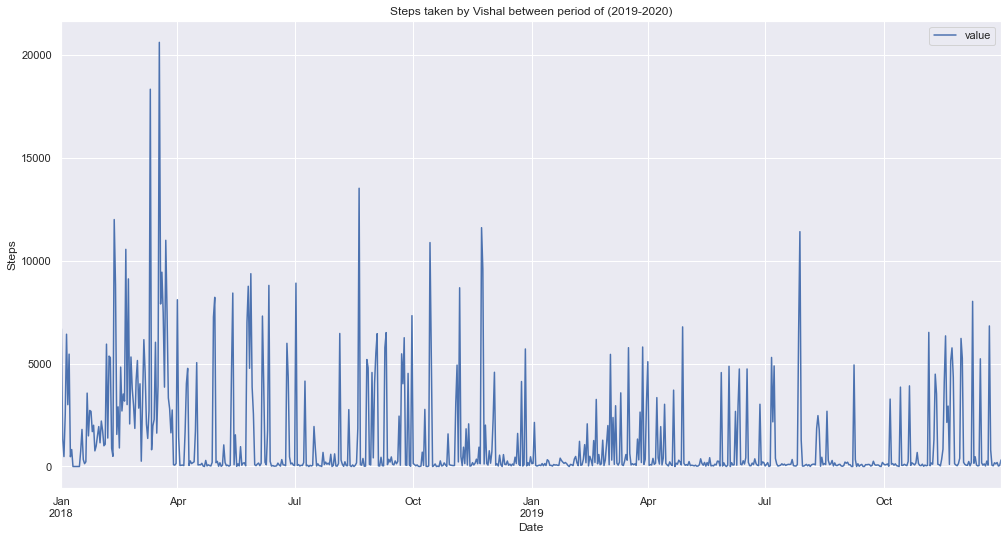

In [70]:
new_steps.plot(figsize=(15,8))
plt.title('Steps taken by Vishal between period of (2019-2020)')
plt.ylabel('Steps')
plt.xlabel('Date')


In [17]:
new_steps=new_steps.resample('D').sum()

In [29]:
new_steps.head()

,value
startDate,
2018-01-01 00:00:00+05:30,6687
2018-01-02 00:00:00+05:30,1340
2018-01-03 00:00:00+05:30,481
2018-01-04 00:00:00+05:30,2517
2018-01-05 00:00:00+05:30,6422


Text(0, 0.5, 'Steps')

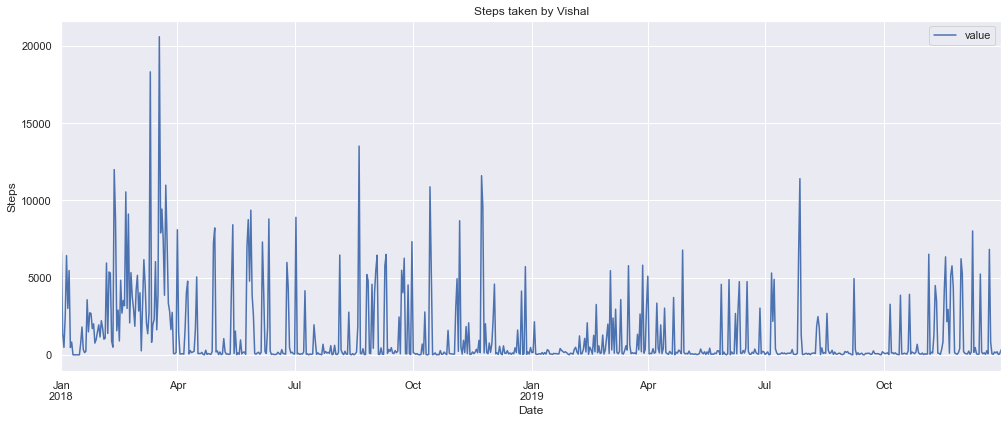

In [31]:
new_steps.plot(figsize=(15,6))
plt.title('Steps taken by Vishal')
plt.xlabel('Date')
plt.ylabel('Steps')

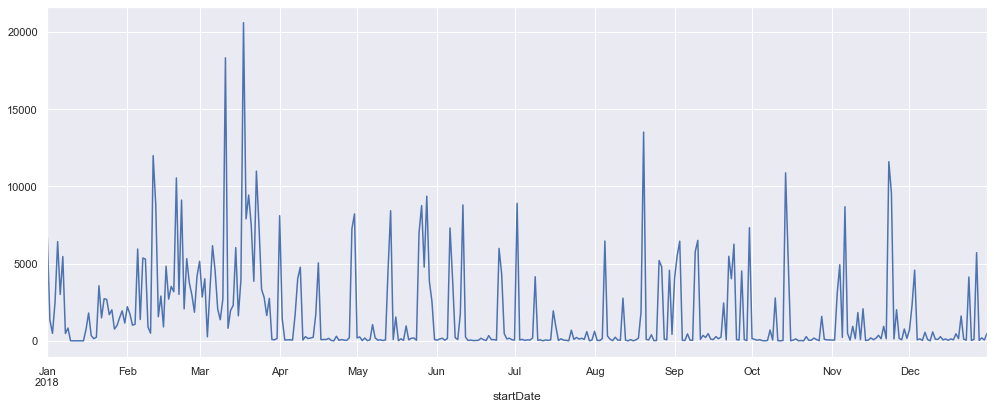

In [32]:
new_steps['2018']['value'].plot(figsize=(15,6))

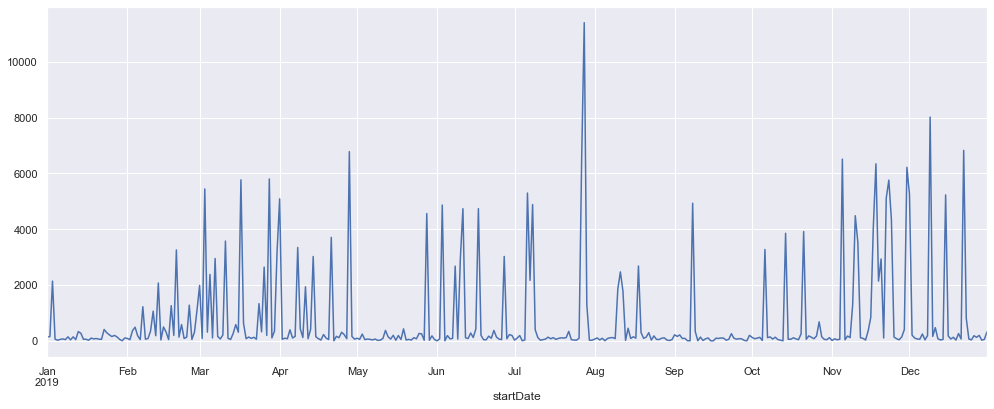

In [33]:
new_steps['2019']['value'].plot(figsize=(15,6))

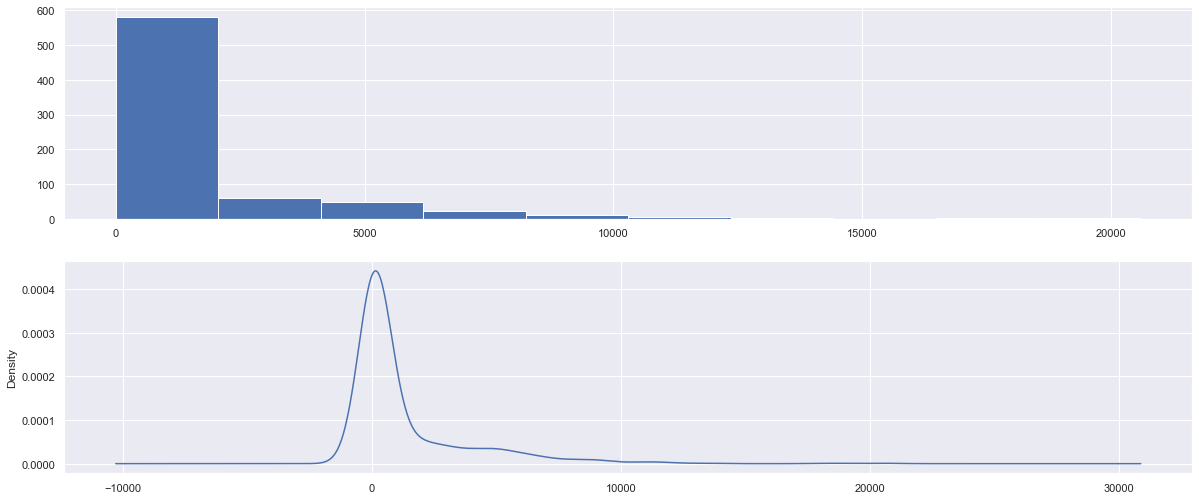

In [36]:
from pandas import Series
from matplotlib import pyplot
pyplot.figure(1)
pyplot.subplot(211)
new_steps.value.hist()
pyplot.subplot(212)
new_steps.value.plot(kind='kde')
pyplot.show()

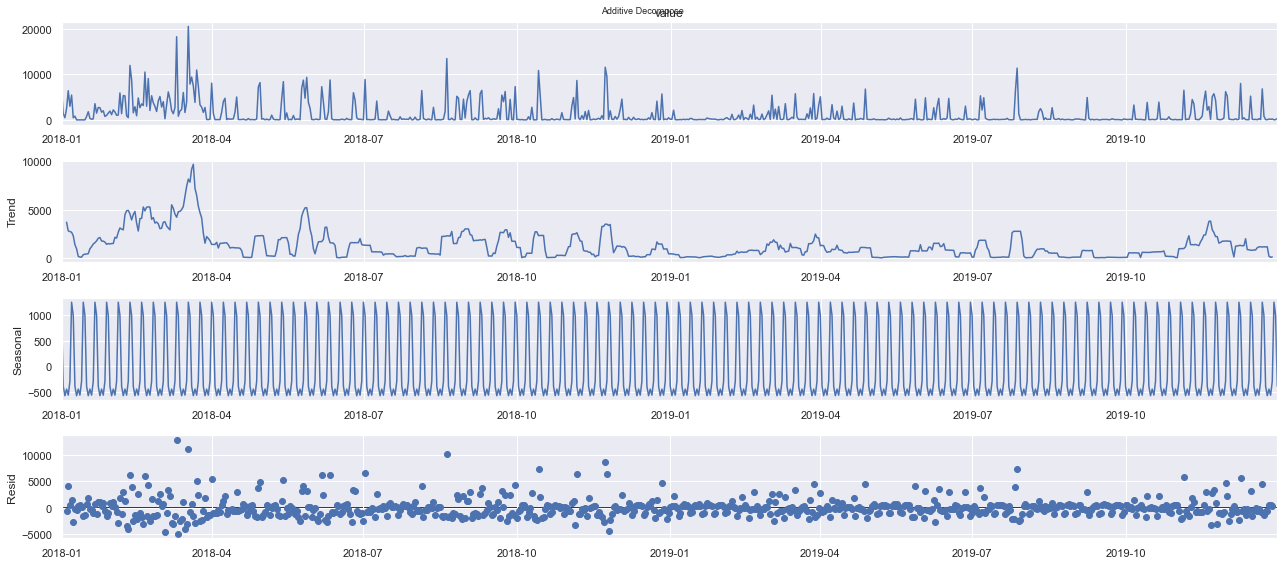

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_mult = seasonal_decompose(new_steps['value'],model ='additive').plot().suptitle('Additive Decompose', fontsize=9)
plt.show()

In [66]:
#Lets See how much data we have
new_steps.shape

(730, 1)

In [161]:
import statsmodels.api as sm

In [162]:
from statsmodels.tsa.stattools import adfuller

In [164]:
#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(new_steps.value, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used',
                                         'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -2.991731
p-value                          0.035674
#Lags Used                      20.000000
Number of Observations Used    709.000000
Critical Value (1%)             -3.439607
Critical Value (5%)             -2.865625
Critical Value (10%)            -2.568945
dtype: float64


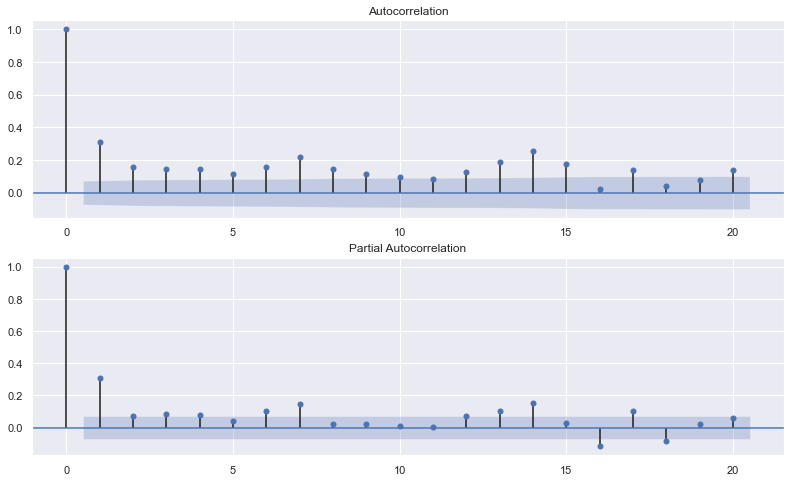

In [165]:
# Classic ACF and PACF Plots for Autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Autocorrelation and partical autocorrelation in the Steps dataset
# Two plots on one sheet
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(new_steps, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(new_steps, lags=20, ax=ax2)

In [173]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(new_steps.value, order=(4,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                  730
Model:                     ARMA(4, 0)   Log Likelihood               -6686.679
Method:                       css-mle   S.D. of innovations           2300.282
Date:                Wed, 28 Apr 2021   AIC                          13385.357
Time:                        00:00:21   BIC                          13412.915
Sample:                    01-01-2018   HQIC                         13395.989
                         - 12-31-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1276.9890    157.088      8.129      0.000     969.102    1584.876
ar.L1.value     0.2739      0.037      7.404      0.000       0.201       0.346
ar.L2.value     0.0438      0.038      1.145    

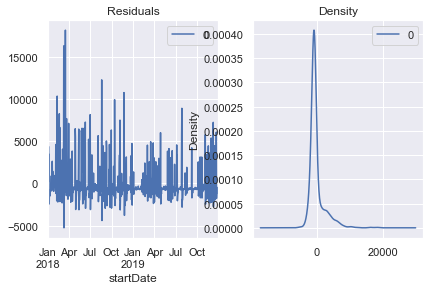

In [174]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

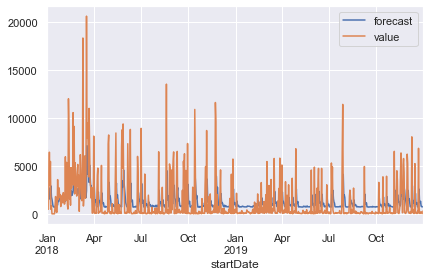

In [175]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [172]:
start = len(train) 
end = len(train) + len(test) - 1
predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values 
predictions.plot(legend = True) 
test['value'].plot(legend = True)

AttributeError: 'tuple' object has no attribute 'predict'